In [ ]:
1. (L6 – 3 ქულა) გამოიყენეთ მონაცემთა წმედის რომელიმე ფუნქციონალი (მაგ. რომელიმე სვეტის მონაცემები
გადაანაწილეთ რამდენიმე ახალ სვეტად, წაშალეთ რომელიმე სვეტი, ცარიელი მნიშვნელობებისთვის
გამოიყენეთ სასურველი ფორმატი, ა.შ.)

In [1]:
import pandas as pd


In [18]:

import pandas as pd
#გამოვიტანოთ ცხრილი
df = pd.read_csv('Earthquakes_database.csv')


#ვნახოთ ჰედერები
print(df.head())

#წავშალოთ რომელიმე სვეტი ცარიელი მნიშვნელობებით
df.dropna(axis=1, how='any', inplace=True)

#საბოლოო შედეგი
print("\nFinal database after cleaning:")
print(df.head())


       Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  1/2/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  1/4/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  1/5/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  1/8/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  1/9/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN   

In [ ]:
(L7 – 3 ქულა) რიცხვითი ტიპის ველის მონაცემები დაყავით კატეგორიებად cut() ფუნქციის გამოყენებით (მაგ.
ასაკის ველი 3 კატეგორიად „Children”, “Adolescent”, “Old”). შესაბამისად დაამატეთ კატეგორიის სვეტი.

In [26]:

#გამოვიტანოთ ჰედერები
print(df.head())

#დავყოთ Date სვეტი როგორც თვე/დღე/წელი
df[['Month', 'Day', 'Year']] = df['Date'].str.split('/', expand=True)

df['Month'] = pd.to_numeric(df['Month'], errors='coerce')
df['Day'] = pd.to_numeric(df['Day'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

#საბოლოო შედეგი
print("\nFinal database after splitting:")
print(df.head())


Initial structure:
       Date      Time  Latitude  Longitude        Type  Depth  Magnitude  \
0  1/2/1965  13:44:18    19.246    145.616  Earthquake  131.6        6.0   
1  1/4/1965  11:29:49     1.863    127.352  Earthquake   80.0        5.8   
2  1/5/1965  18:05:58   -20.579   -173.972  Earthquake   20.0        6.2   
3  1/8/1965  18:49:43   -59.076    -23.557  Earthquake   15.0        5.8   
4  1/9/1965  13:32:50    11.938    126.427  Earthquake   15.0        5.8   

             ID  Source Location Source Magnitude Source     Status Month Day  \
0  ISCGEM860706  ISCGEM          ISCGEM           ISCGEM  Automatic     1   2   
1  ISCGEM860737  ISCGEM          ISCGEM           ISCGEM  Automatic     1   4   
2  ISCGEM860762  ISCGEM          ISCGEM           ISCGEM  Automatic     1   5   
3  ISCGEM860856  ISCGEM          ISCGEM           ISCGEM  Automatic     1   8   
4  ISCGEM860890  ISCGEM          ISCGEM           ISCGEM  Automatic     1   9   

   Year  
0  1965  
1  1965  
2  1965

In [ ]:
(L9 – 3 ქულა) გამოიყენეთ მონაცემთა “Reshaping”-ის ჩამოთვლილი ფუნქციებიდან რომელიმე 2 მათგანი
(stack(), unstack(), melt(), pivot(), explode(), pivot_table(), Crosstab())

In [28]:


#ავიღოთ სვეტები Melt ფუნქციისთვის
columns_to_melt = ['Date', 'Magnitude', 'Depth']

# Melt the dataframe
melted_df = pd.melt(df, id_vars=['Date'], value_vars=columns_to_melt, 
                    var_name='Variable', value_name='Value')

#გამოვიტანოთ შედეგი
print("\nMelted dataframe:")
print(melted_df.head())



Melted dataframe:
       Date   Variable  Value
0  1/2/1965  Magnitude    6.0
1  1/4/1965  Magnitude    5.8
2  1/5/1965  Magnitude    6.2
3  1/8/1965  Magnitude    5.8
4  1/9/1965  Magnitude    5.8


In [39]:
#Pivot Table 
#გადავიყვანოთ Date სვეტი შესაბამის ფორმატში -ერორების გათვალისსწინებით
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')

#ვნახოთ ისეთი მნიშვნელობები სვეტში სადაც არასწორად/ფორმატის არაშესაბამისად არის თარიღი გადაცემული
invalid_dates = df[df['Date'].isna()]
print("\nRows with invalid dates:")
print(invalid_dates)

#წავშალოთ ესეთი მნიშვნელობები
df.dropna(subset=['Date'], inplace=True)

#განვაცალკევოთ თვე და წელი Date სვეტიდან
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

#შევქმნათ Pivot table
pivot_table_df = df.pivot_table(index='Month', columns='Year', values='Magnitude', aggfunc='mean')

print("\nPivot table:")
print(pivot_table_df)



Rows with invalid dates:
Empty DataFrame
Columns: [Date, Time, Latitude, Longitude, Type, Depth, Magnitude, ID, Source, Location Source, Magnitude Source, Status, Month, Day, Year]
Index: []

Pivot table:
Year       1965      1966      1967      1968      1969      1970      1971  \
Month                                                                         
1      6.123077  5.825000  5.969444  6.117391  6.200000  6.096000  5.988235   
2      5.955556  6.059259  6.133333  6.020000  6.295238  5.960606  5.996429   
3      6.057895  6.160870  5.995652  5.893750  6.026667  6.028462  5.892857   
4      5.945455  5.961905  5.915789  6.186923  5.919355  6.030952  5.876923   
5      5.954545  5.872727  5.916667  6.185714  5.941176  6.074074  5.958333   
6      5.906250  6.037037  5.786364  5.990323  5.922222  6.103030  5.888889   
7      5.923810  6.041667  6.220000  6.047826  5.854545  6.231818  6.043750   
8      6.314706  5.984286  5.945833  6.165000  6.067742  6.066667  5.963889   
9   

In [ ]:
ააგეთ თქვენთვის სასურველი 4 განსხვავებული დიაგრამა შემდეგი ტიპებიდან (ხაზოვანი
დიაგრამა, სვეტოვანი დიაგრამა, გაფანტულობის დიაგრამა, წრიული დიაგრამა, ჰისტოგრამა).

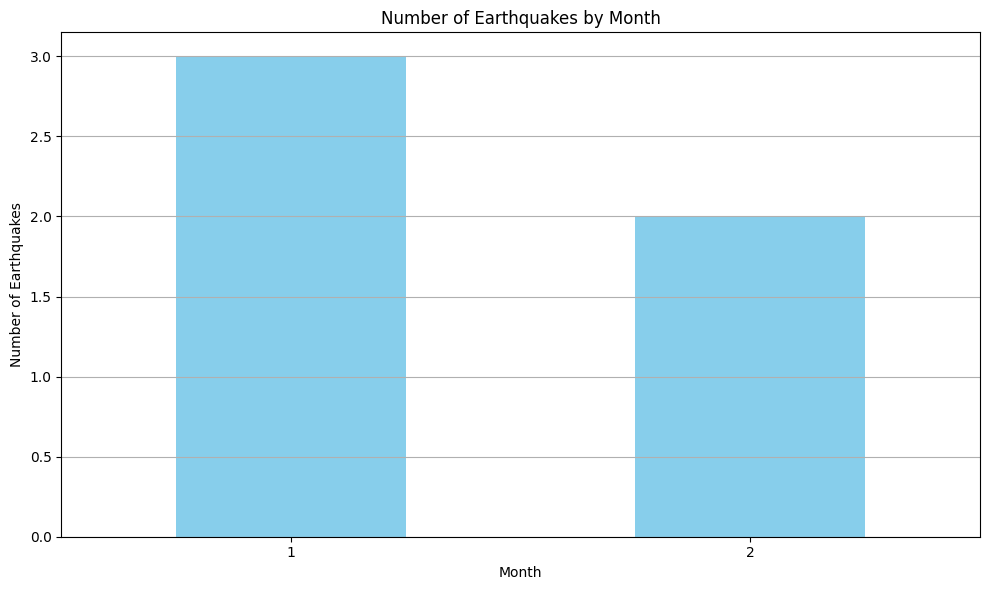

In [52]:
import matplotlib.pyplot as plt

df['Month'] = df['Date'].dt.month
earthquakes_by_month = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
earthquakes_by_month.plot(kind='bar', color='skyblue')
plt.title('Number of Earthquakes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


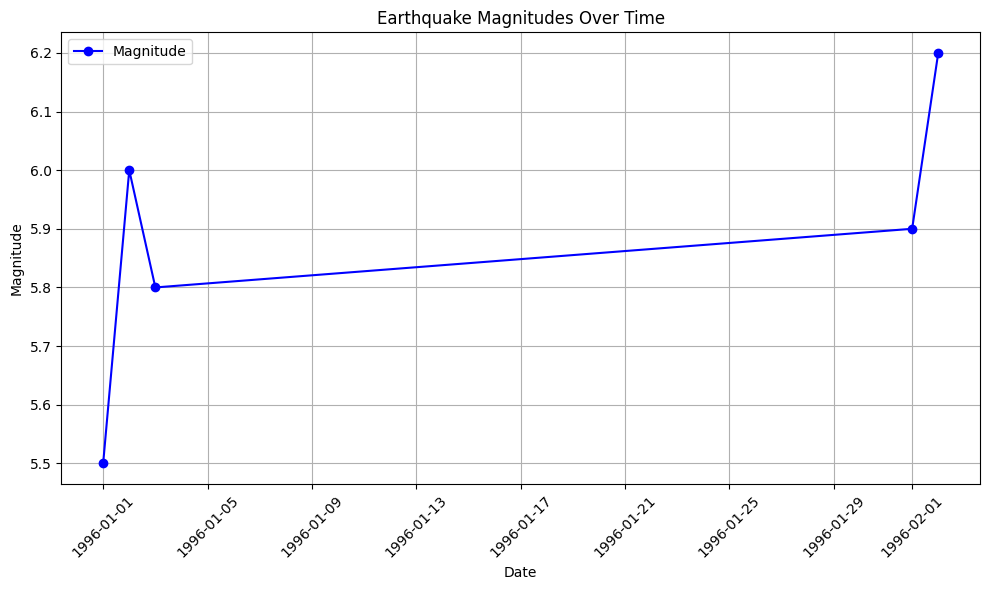

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

df = df.sort_values(by='Date')
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Magnitude'], marker='o', linestyle='-', color='b', label='Magnitude')
plt.title('Earthquake Magnitudes Over Time')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


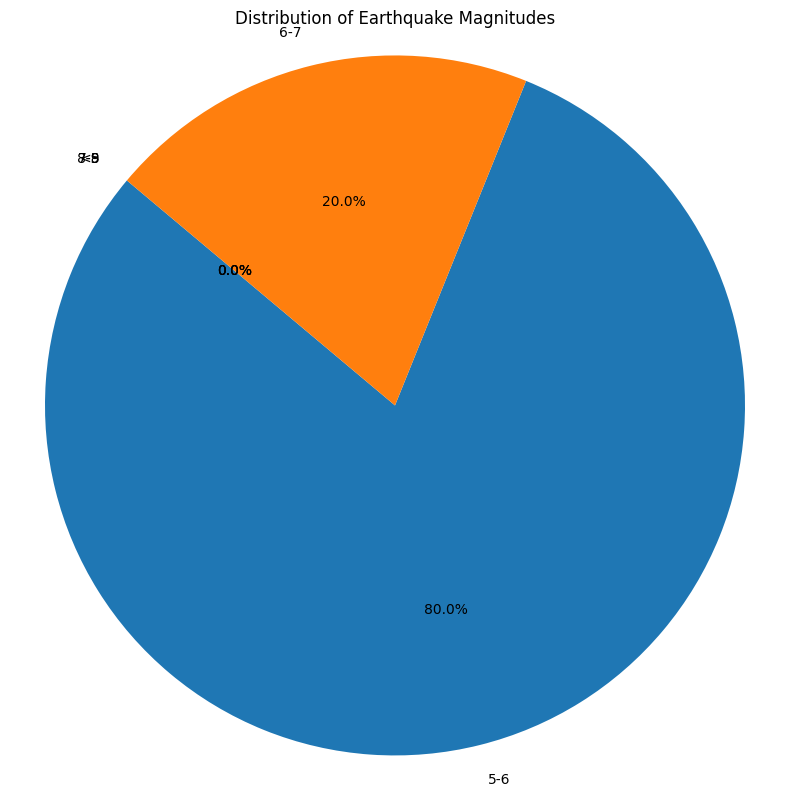

In [44]:
magnitude_bins = [0, 5, 6, 7, 8, 9]
magnitude_labels = ['<5', '5-6', '6-7', '7-8', '8-9']
df['Magnitude Category'] = pd.cut(df['Magnitude'], bins=magnitude_bins, labels=magnitude_labels)

magnitude_distribution = df['Magnitude Category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(magnitude_distribution, labels=magnitude_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Earthquake Magnitudes')
plt.axis('equal') 
plt.tight_layout()
plt.show()


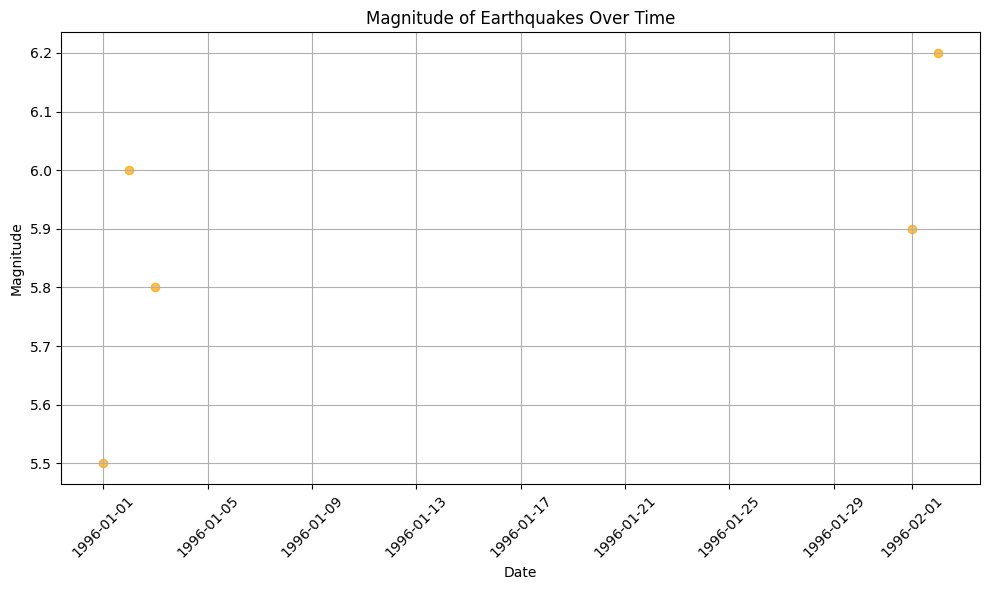

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

#df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

df.sort_values(by='Date', inplace=True)

plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Magnitude'], color='orange', alpha=0.7)
plt.title('Magnitude of Earthquakes Over Time')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
გამოიყენეთ თარიღებთან სამუშაო მინიმუმ 2 განსხვავებული ფუნქცია/ტრანსფორმაცია
სურვილისამებრ (მაგ. resample ფუნქცია).

In [55]:

#გამოვყოთ წელი Date სვეტიდან
df['Year'] = df['Date'].dt.year

print("DataFrame with Year column:")
print(df[['Date', 'Year']])


DataFrame with Year column:
        Date  Year
0 1996-01-01  1996
1 1996-01-02  1996
2 1996-01-03  1996
3 1996-02-01  1996
4 1996-02-02  1996
